In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('C:/Users/Arvind Mishra/Desktop/Commercial/commercial.csv')
df.head()

,Quarterly_Period,Year,Locality,Lower price Range,Upper price Range,Average Price
0,2,2019,Andheri,12845.0,22330.0,17588.0
1,1,2019,Andheri,13752.0,22496.0,18124.0
2,4,2018,Andheri,13409.0,23106.0,18257.0
3,3,2018,Andheri,13681.0,22969.0,18325.0
4,2,2018,Andheri,14079.0,23628.0,18853.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
Quarterly_Period     397 non-null int64
Year                 397 non-null int64
Locality             397 non-null object
Lower price Range    397 non-null float64
Upper price Range    397 non-null float64
Average Price        397 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 18.7+ KB


In [4]:
df.columns

Index(['Quarterly_Period ', 'Year', 'Locality', 'Lower price Range',
       'Upper price Range', 'Average Price'],
      dtype='object')

In [5]:
df.shape

(397, 6)

In [6]:
numeric_cols=list(df.select_dtypes(exclude=['object']))
numeric_cols

['Quarterly_Period ',
 'Year',
 'Lower price Range',
 'Upper price Range',
 'Average Price']

In [7]:
categorical_cols=list(df.select_dtypes(include=['object']))
categorical_cols

['Locality']

In [8]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('---'*20)

Quarterly_Period 
[2 1 4 3]
------------------------------------------------------------
Year
[2019 2018 2017 2016 2015 2014 2013]
------------------------------------------------------------
Locality
['Andheri' 'Andheri East' 'Andheri Link Road' 'Andheri West' 'Bandra'
 'Bandra East' 'Bandra Kurla Complex' 'Bhandup' 'Bhandup West' 'Borivali'
 'Borivali West' 'Chakala' 'Chembur' 'Dadar' 'Fort' 'Goregaon'
 'Goregaon East' 'Goregaon West' 'Kalbadevi' 'Kandivali East'
 'Kandivali West']
------------------------------------------------------------
Lower price Range
[12845.    13752.    13409.    13681.    14079.    13169.    13149.
 13199.    12137.    12928.    12118.    12036.    12260.    11590.
 11476.    11818.    11805.    11989.    12017.    11869.    11231.
 11328.    11479.    11058.    10997.    10928.    11077.    10925.
 10864.    10555.    10068.     9550.    10035.    10031.    17938.
 17600.    17353.    16740.    17074.    17065.    16794.    16360.
 15707.    15144.    151

In [9]:
df['Year'].replace({2019:1,2018:2,2017:3,2016:4,2015:5,2014:6,2013:7},inplace=True)

In [10]:
df.head()

,Quarterly_Period,Year,Locality,Lower price Range,Upper price Range,Average Price
0,2,1,Andheri,12845.0,22330.0,17588.0
1,1,1,Andheri,13752.0,22496.0,18124.0
2,4,2,Andheri,13409.0,23106.0,18257.0
3,3,2,Andheri,13681.0,22969.0,18325.0
4,2,2,Andheri,14079.0,23628.0,18853.0


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
labelEnc=LabelEncoder()
df[categorical_cols]=df[categorical_cols].apply(LabelEncoder().fit_transform)

In [13]:
df.head()

,Quarterly_Period,Year,Locality,Lower price Range,Upper price Range,Average Price
0,2,1,0,12845.0,22330.0,17588.0
1,1,1,0,13752.0,22496.0,18124.0
2,4,2,0,13409.0,23106.0,18257.0
3,3,2,0,13681.0,22969.0,18325.0
4,2,2,0,14079.0,23628.0,18853.0


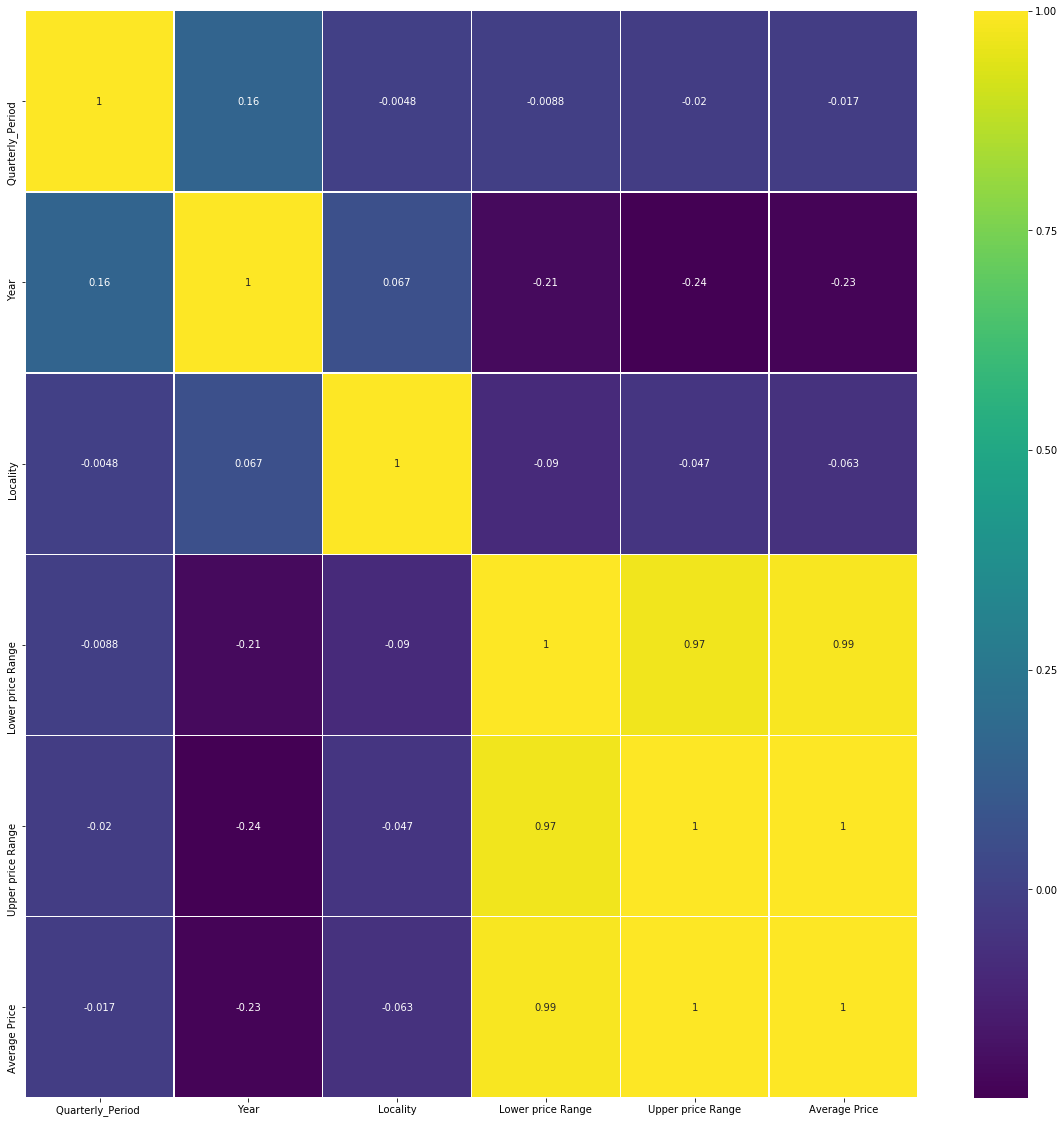

In [14]:
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=0.5,ax=ax)

In [15]:
df['Average Price'].describe()

count      397.000000
mean     19806.056360
std       6541.483545
min      10342.000000
25%      14571.000000
50%      18110.000000
75%      23552.000000
max      37246.000000
Name: Average Price, dtype: float64

In [16]:
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm


 mu = 19806.06 and sigma = 6533.24



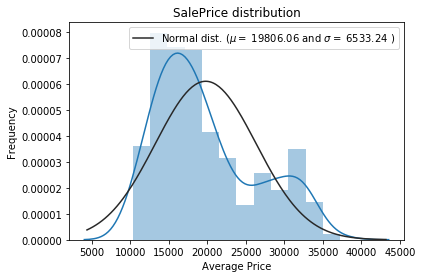

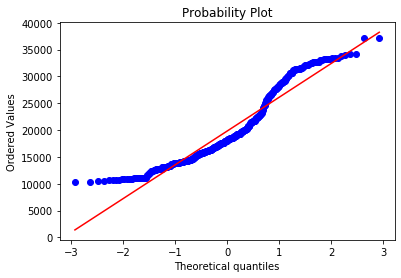

Skewness: 0.740368
Kurtosis: -0.507884


In [17]:
sns.distplot(df['Average Price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['Average Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(df['Average Price'], plot=plt)
plt.show()

print("Skewness: %f" % df['Average Price'].skew())
print("Kurtosis: %f" % df['Average Price'].kurt())


 mu = 9.84 and sigma = 0.32



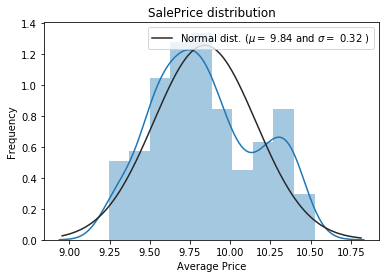

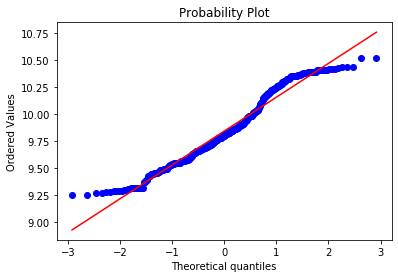

Skewness: 0.259803
Kurtosis: -0.838824


In [18]:
df['Average Price'] = np.log1p(df['Average Price'])

#Check the new distribution 
sns.distplot(df['Average Price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['Average Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(df['Average Price'], plot=plt)
plt.show()

print("Skewness: %f" % df['Average Price'].skew())
print("Kurtosis: %f" % df['Average Price'].kurt())
 

In [19]:
  from sklearn.model_selection import train_test_split

In [20]:
X=df.drop('Average Price',axis=1)
y=df['Average Price']

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=6)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [23]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
r2=r2_score(y_test,y_pred)
print(r2)

0.9787040830312282


In [24]:
from sklearn.linear_model import Ridge

In [25]:

ridge=Ridge(alpha=2)
ridge.fit(X_train,y_train)
ridge_pred=ridge.predict(X_test)
r2_ridge=r2_score(y_test,ridge_pred)
print(r2_ridge)

0.9787043226645568


In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
regressor=LinearRegression()
score=cross_val_score(regressor,X_train,y_train,cv=10)
print(score)
mean_score=score.mean()
print(mean_score)

[0.9460605  0.9778123  0.97609321 0.96485246 0.98025722 0.97702734
 0.97908576 0.97052081 0.97860008 0.98165751]
0.9731967189490763


In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [29]:
model=make_pipeline(PolynomialFeatures(2),LinearRegression())
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_poly=r2_score(y_test,y_pred)
print(r2_poly)

0.9991953605549111


In [30]:
df.head()

,Quarterly_Period,Year,Locality,Lower price Range,Upper price Range,Average Price
0,2,1,0,12845.0,22330.0,9.775029
1,1,1,0,13752.0,22496.0,9.805047
2,4,2,0,13409.0,23106.0,9.812359
3,3,2,0,13681.0,22969.0,9.816076
4,2,2,0,14079.0,23628.0,9.844480
